# Importing the libraries

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=09ddf348647f6fd9ae04a11d81720b327d6b6a346699ffa8175a8bcb6f341a38
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [3]:
dataset = pd.read_csv('College.csv')
X = dataset.iloc[:, 2:].values
y_real = dataset.iloc[:, [1]].values

# Encoding the y_real variable

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_real = le.fit_transform(y_real)
print (y_real)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 0 1 1 1 

# Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM

In [6]:
from minisom import MiniSom
som = MiniSom(x = 2, y = 1, input_len = 17, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results

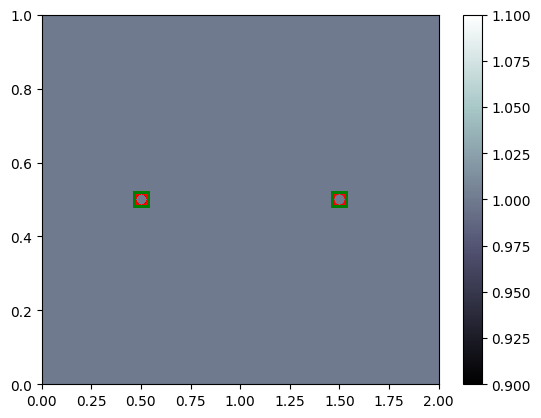

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_real[i]],
         markeredgecolor = colors[y_real[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the inverse transform

In [8]:
mappings = som.win_map(X)
frauds = []
for node in [(0,0), (1,0)]:
  if node in mappings: # Check if the node exists in the mappings
    data_points = mappings[node]
    # Convert data_points to a NumPy array if it's a list
    if isinstance(data_points, list):
        data_points = np.array(data_points)
    # If data_points is 1D, reshape it to 2D
    if data_points.ndim == 1:
        data_points = data_points.reshape(1, -1)  # Reshape to 2D for single sample
    else:
        data_points = data_points.reshape(-1, data_points.shape[1]) # Reshape for multiple samples ensuring correct number of features

    frauds.extend(data_points)

# Check if frauds is empty before applying inverse_transform
if frauds:
  frauds = np.array(frauds) # Convert the list back to a NumPy array
  frauds = sc.inverse_transform(frauds)
  print(frauds)
else:
  print("No frauds found for the specified nodes.")

[[1.6600e+03 1.2320e+03 7.2100e+02 ... 1.2000e+01 7.0410e+03 6.0000e+01]
 [2.1860e+03 1.9240e+03 5.1200e+02 ... 1.6000e+01 1.0527e+04 5.6000e+01]
 [1.4280e+03 1.0970e+03 3.3600e+02 ... 3.0000e+01 8.7350e+03 5.4000e+01]
 ...
 [1.5010e+03 9.3500e+02 2.7300e+02 ... 4.2000e+01 7.8750e+03 7.5000e+01]
 [2.7680e+03 2.3140e+03 6.8200e+02 ... 3.4000e+01 1.0774e+04 8.2000e+01]
 [1.0705e+04 2.4530e+03 1.3170e+03 ... 4.9000e+01 4.0386e+04 9.9000e+01]]


# Assigning cluster numbers for accuracy guaging

In [19]:
y_som = []
for x in X:
  bmu = som.winner(x)
  if bmu[0] == 0:
    y_som.append(1)
  else:
    y_som.append(0)
print (y_som)



[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_real, y_som)
print(cm)
accuracy_score(y_real, y_som)

[[ 17 195]
 [199 366]]


0.4929214929214929